## Описание датасета 

Есть 34 поля. Первые 27 полей описывают, геометрическую форму дефекта и его контур на нержавеющей пластине. Последние семь столбцов представляют собой класс дефекта.

Классы дефектов:
* Pastry
* Z_Scratch
* K_Scatch
* Stains
* Dirtiness
* Bumps
* Other_Faults


train_data.csv - данные для обучения <br>
test_data.csv - данные для проверки. Нет классов дефекта.

## Задание

* Нужно правильно классифицировать тип поверхностных дефектов в пластинах из нержавеющей стали с шестью типами возможных дефектов (плюс «другие»).

* При выполнении задания важно то, как вы исследуете данные и как приходите к выбору той или иной модели.

* В качестве выполненного задания: 
    1. табличку с предсказанными результатами
    2. тетрадку jupyter - python с вашим исследованием данных и выбором модели.

In [103]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from collections import OrderedDict

## Data Exploration

In [107]:
def class_counts(data):
    colors = {
        'Pastry': 'green',
        'Z_Scratch': 'purple',
        'K_Scatch': 'gold', 
        'Stains': 'red',
        'Dirtiness': 'darkblue',
        'Bumps': 'sandybrown', 
        'Other_Faults': 'orange'
    }
    mp = {
        0: 'Pastry',
        1: 'Z_Scratch',
        2: 'K_Scatch', 
        3: 'Stains',
        4: 'Dirtiness',
        5: 'Bumps', 
        6: 'Other_Faults'
    }
    
    labels = data.iloc[:, 27:34].values
    classes = {'class': [np.argmax(row) for row in labels]}
    classes_df = pd.DataFrame.from_dict(classes)
    class_counts_df = classes_df['class'].value_counts().to_frame().reset_index()
    class_counts_df = class_counts_df.replace({'index': mp})
    class_counts_df['color'] = class_counts_df['index'].map(colors)
    class_counts_df.plot.pie(
        y='class',
        labels=class_counts_df['index'],
        colors=class_counts_df['color'],
        autopct='%.2f',
        fontsize=12,
        figsize=(8, 8),
        shadow=True,
        startangle=140
    )
    
    print("Skewness: {:.4f}".format(class_counts_df['class'].skew()))
    print("Kurtosis: {:.4f}".format(class_counts_df['class'].kurt()))
    
    #sns.distplot(class_counts_df['class'])

In [124]:
train_df = pd.read_csv('train_data.csv')
test_df = pd.read_csv('test_data.csv')

train_df = shuffle(train_df)
test_df = shuffle(test_df)

X_train = train_df.iloc[:, :27] 
y_train = train_df.iloc[:, 27:34]

print(train_df.shape)
train_df.head()

(1296, 34)


,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
823,98,164,189519,189532,350,107,39,46379,125,143,...,-0.8030,0.0353,0.9760,0,0,0,0,0,1,0
1067,1563,1579,173199,173219,174,30,27,20469,106,127,...,0.2000,-0.0809,0.5296,0,0,0,0,0,0,1
141,506,519,548929,548953,170,28,25,20000,105,126,...,0.4583,-0.0809,0.5162,0,1,0,0,0,0,0
163,244,275,923170,923211,709,84,55,83627,105,132,...,0.2439,-0.0785,0.9984,0,1,0,0,0,0,0
678,1134,1156,728281,728304,375,32,23,34485,48,132,...,0.0435,-0.2816,0.7955,0,0,0,0,0,1,0


In [ ]:
### skeweness - measure of the assymetry of the pr dist of a r.v. about its mean
### if 1 < skeweness < -1 => distribution is highly skewed

### kurtosis tells the height and sharpness of the central peak

Skewness: 0.9124
Kurtosis: 0.1513


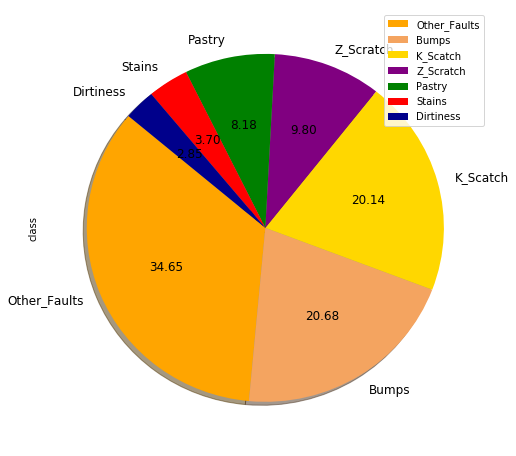

In [108]:
class_counts(train_df)

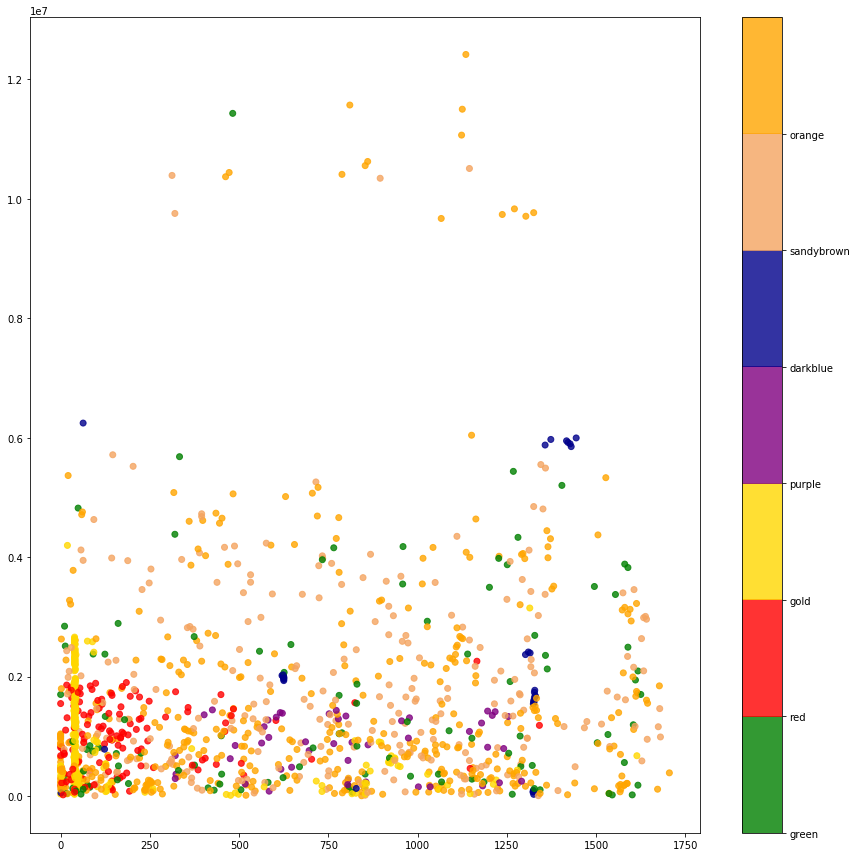

In [117]:
x = train_df['X_Minimum'].values
y = train_df['Y_Minimum'].values
labels = [np.argmax(row) for row in train_df.iloc[:, 27:34].values]

fig = plt.figure(figsize=(15, 15))
colors = ['green', 'red', 'gold', 'purple', 'darkblue', 'sandybrown', 'orange']
plt.scatter(x, y, c=labels, cmap=ListedColormap(colors), alpha=0.8)

cb = plt.colorbar()
loc = np.arange(0, max(labels), max(labels)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(colors)

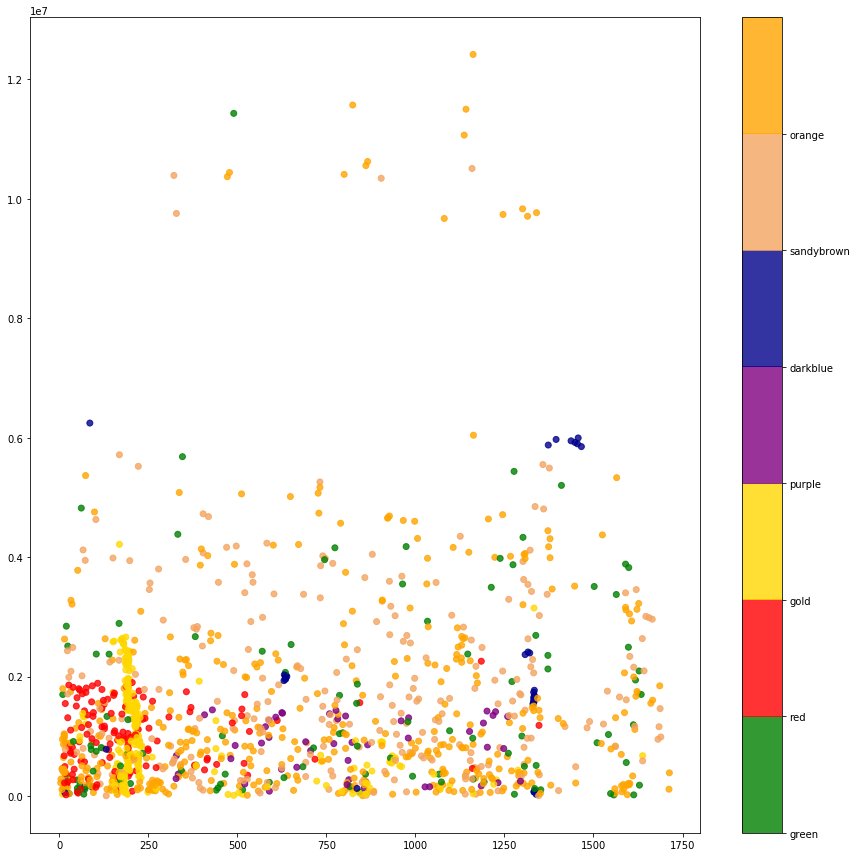

In [116]:
x = train_df['X_Maximum'].values
y = train_df['Y_Maximum'].values
labels = [np.argmax(row) for row in train_df.iloc[:, 27:34].values]

fig = plt.figure(figsize=(15, 15))
colors = ['green', 'red', 'gold', 'purple', 'darkblue', 'sandybrown', 'orange']
plt.scatter(x, y, c=labels, cmap=ListedColormap(colors), alpha=0.8)

cb = plt.colorbar()
loc = np.arange(0, max(labels), max(labels)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(colors)

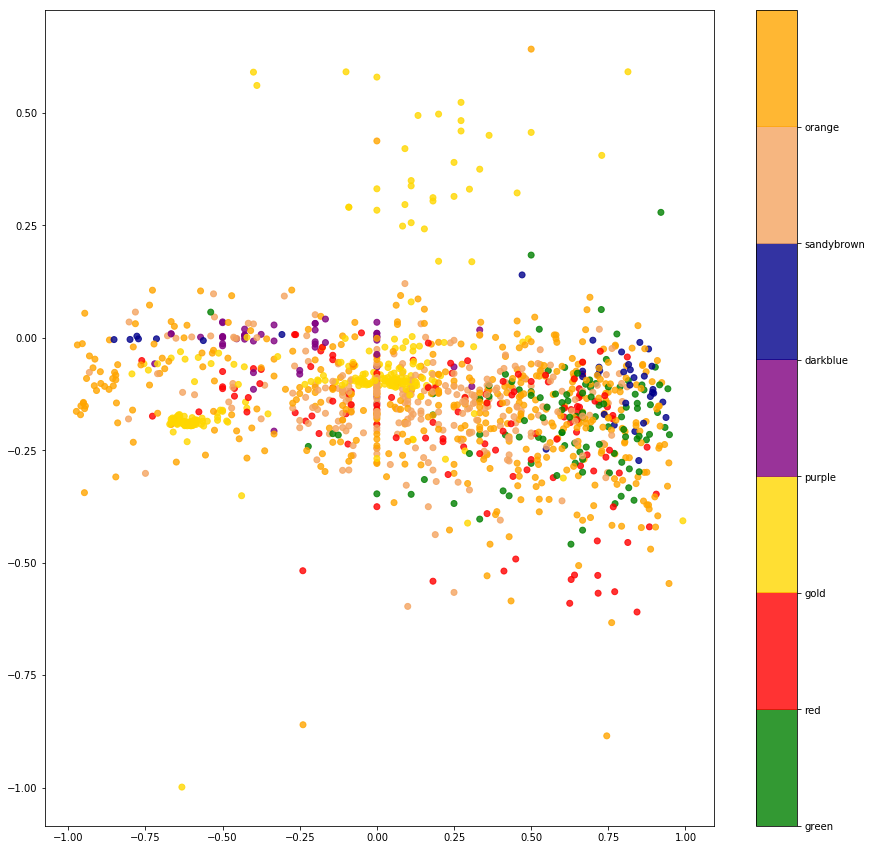

In [121]:
x = train_df['Orientation_Index'].values
y = train_df['Luminosity_Index'].values
labels = [np.argmax(row) for row in train_df.iloc[:, 27:34].values]

fig = plt.figure(figsize=(15, 15))
colors = ['green', 'red', 'gold', 'purple', 'darkblue', 'sandybrown', 'orange']
plt.scatter(x, y, c=labels, cmap=ListedColormap(colors), alpha=0.8)

cb = plt.colorbar()
loc = np.arange(0, max(labels), max(labels)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(colors)

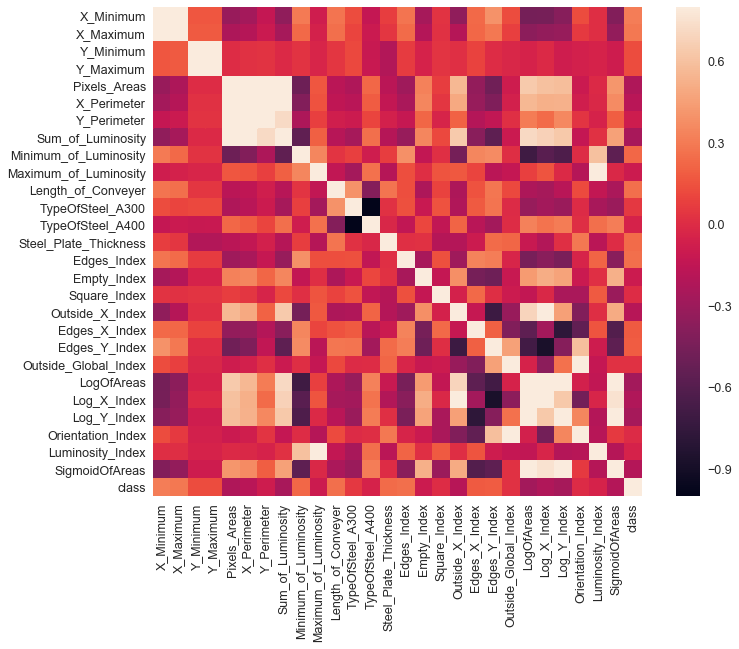

In [189]:
labels = train_df.iloc[:, 27:34].values
X_train_c = X_train.copy()
X_train_c['class'] = [np.argmax(row) for row in labels]
corr = X_train_c.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=0.8, square=True)

From the above correlation matrix me can explore correlations between independent variables (features):
    1. Pairwise features like 'X_Minimum' and 'X_Maximum', 'Y_Minimum' and 'Y_Minimum' are stringly correlated 
    2. 'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity' strongly correlate with each other
    3. 'LogOfAreas', 'Log_X_Index', 'Log_Y_Index' strongly correalte
    4. 'TypeOfSteel_A300' and 'TypeOfSteel_A400' have strong negative correlation 
    => we need only one of the variables (ex.: either 'X_Minimum' or 'X_Maximum' and 'Y_Minimum' or 'Y_Minimum')
    => we would pick the one that has less correlation with other features:
        (1) 'X_Maximum', 'Y_Maximum'
        (2) obvious that 'Y_Perimeter' has less correlation with remaning variables compared to other features
        (3) 'Log_Y_Index' as it has stronger correlation with labels
        (4) 'TypeOfSteel_A300'
    1. 'Edges_Y_Index' and 'Log_X_Index', 'Edges_X_Index' and 'Log_Y_Index', 'Minimum_of_Luminosity' and 'LogOfAreas'
        (1) We leave 'Log_Y_Index'
there is a slight correlation between classes and 'X_Minimum', 'X_Maximum', 'Length_of_Conveyer', 'Edges_Index', 'Minimum_of_Luminosity'

before bropping umbuguois (one of the highly correlated features from the pair), lets zoom the heatmap to see the correlation between labels and features

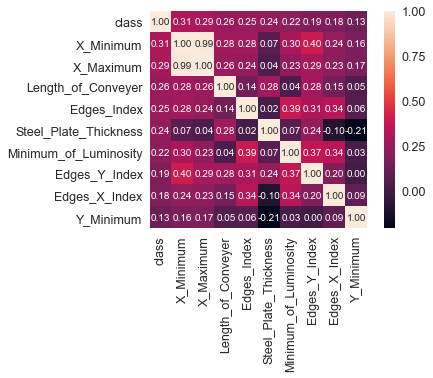

In [190]:
k = 10 #number of variables for heatmap
cols = corr.nlargest(k, 'class')['class'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In the case when we represent different classes as one variable we observe weak correlation of the dependent variable with every single feature

In [196]:
#, 'Pixels_Areas', 'X_Perimeter', 'Sum_of_Luminosity', 'LogOfAreas', 'Log_X_Index', 'TypeOfSteel_A400', 'Edges_Y_Index', 'Edges_X_Index', 'Log_X_Index', 'Minimum_of_Luminosity', 'LogOfAreas'
train_df_cleaned = X_train_c.drop(['Y_Maximum', 'X_Maximum', 'Pixels_Areas', 'X_Perimeter', 'Sum_of_Luminosity', 'TypeOfSteel_A400', 'Log_X_Index', 'Log_Y_Index'], axis = 1)

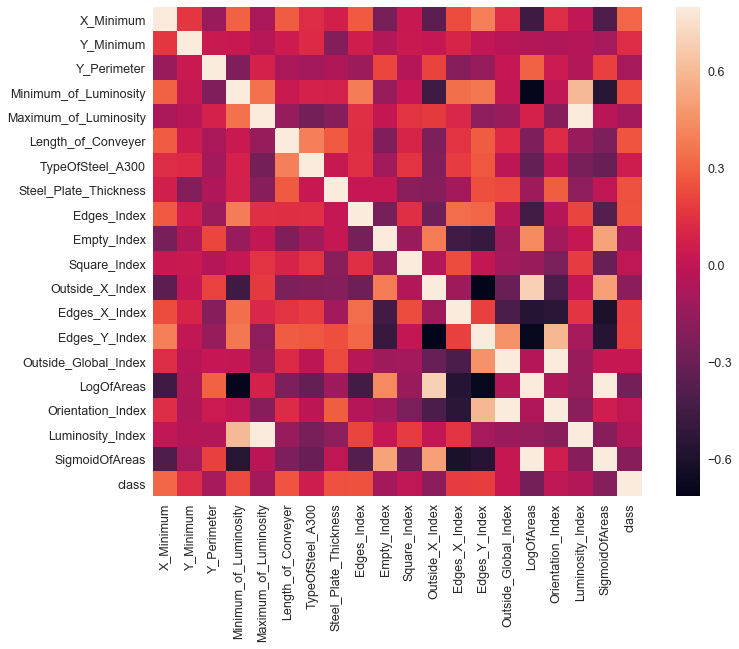

In [197]:
#corr = train_df_cleaned.iloc[:, :-8].corr()
corr = train_df_cleaned.iloc[:, :].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=0.8, square=True)

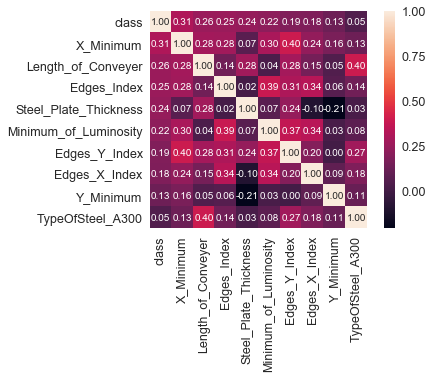

In [198]:
k = 10 #number of variables for heatmap
cols = corr.nlargest(k, 'class')['class'].index
cm = np.corrcoef(train_df_cleaned[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

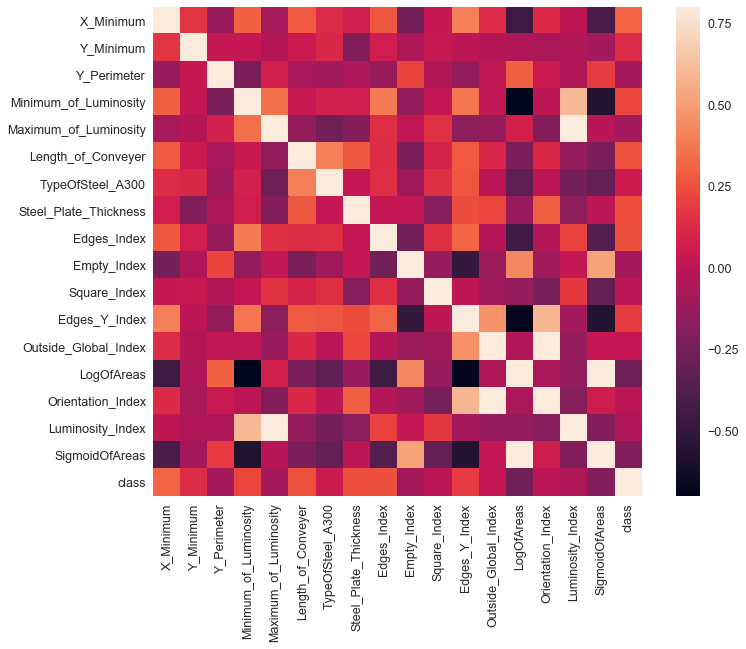

In [199]:
train_df_cleaned = train_df_cleaned.drop(['Edges_X_Index', 'Outside_X_Index'], axis=1)
corr = train_df_cleaned.iloc[:, :].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=0.8, square=True)

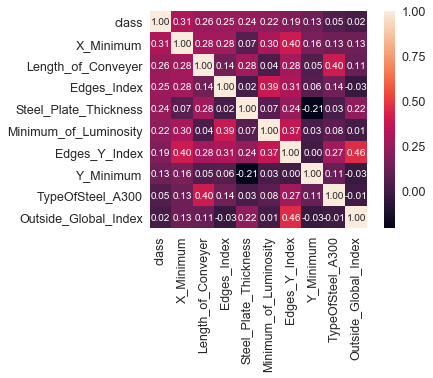

In [200]:
k = 10 #number of variables for heatmap
cols = corr.nlargest(k, 'class')['class'].index
cm = np.corrcoef(train_df_cleaned[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Scatter plots between 'class' and more or less correlated variables

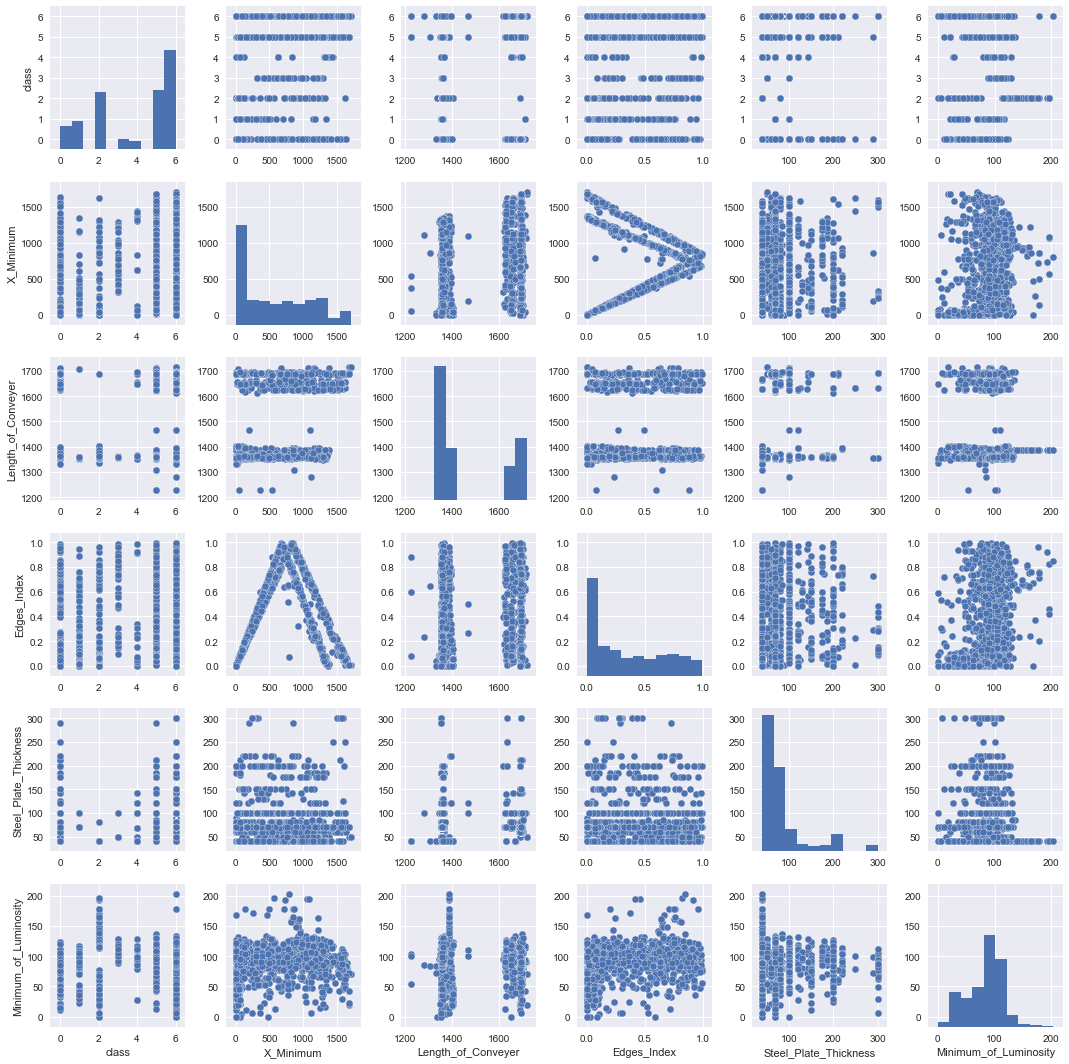

In [202]:
sns.set()
cols = ['class', 'X_Minimum', 'Length_of_Conveyer', 'Edges_Index', 'Steel_Plate_Thickness', 'Minimum_of_Luminosity']
sns.pairplot(train_df_cleaned[cols], size=2.5)